# JHMDB
http://jhmdb.is.tue.mpg.de/dataset

Download the dataset and extract it so that your folder structure is as follows:

* /path/to/your/JHMDB
    * /images
        * /brush_hair
        * /catch
        * /...
    * /person_poses


In [1]:
%matplotlib inline
import json; from pprint import pprint
Settings = json.load(open('settings.txt'))
import matplotlib.pyplot as plt
import numpy as np
import sys
from time import time
sys.path.insert(0,'../')

from pak.datasets.JHMDB import JHMDB

jhmdb_root = Settings['jhmdb_root']
fmmap = Settings['jhmdb_memmap']  # file with *.npy 

_start = time()
jhmdb = JHMDB(jhmdb_root, fmmap, verbose=False)
_end = time()
print('elapsed', _end - _start)

elapsed 175.30204796791077


Action clap
Video boom_snap_clap_(challenge)_HARDCORE_VERSION!_clap_u_nm_np1_fr_bad_0
(40, 42)
(40, 14, 3)
0.716266
0.751246
0.406958
0.727751
0.673288
0.543263
0.371005
0.347509
0.24648
0.022149
0.002874
0.089298
0.015667
0.004184


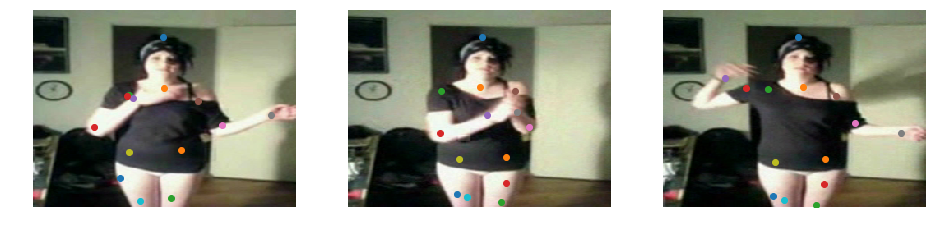

In [39]:
Actions = jhmdb.get_all_actions()
action = Actions[np.random.randint(0, len(Actions))]
Videos = jhmdb.get_all_videos_for_action(action)
video = Videos[np.random.randint(0, len(Videos))]

print('Action', action)
print('Video', video)

V, gt = jhmdb.load(action, video)

print(gt.shape)

gt = gt.reshape(-1, 14, 3)
print(gt.shape)


fig = plt.figure(figsize=(16,8))

ax = fig.add_subplot(131); ax.axis('off')
ax.imshow(V[0])
for x, y, w in gt[0]:
    print(w)
    ax.scatter(x, y)


ax = fig.add_subplot(132); ax.axis('off')
ax.imshow(V[int(len(V)/2)])
for x, y, _ in gt[int(len(V)/2)]:
    ax.scatter(x, y)

ax = fig.add_subplot(133); ax.axis('off')
ax.imshow(V[-1])
for x, y, w in gt[-1]:
    ax.scatter(x, y)